In [86]:
import os
import json
import pandas as pd
import numpy as np
from modules.extract_results import display_results_by_subdistribution, display_results_by_named_entity, \
                                    display_confusion_matrix, extract_results_to_txt_file
import matplotlib.pyplot as plt

In [2]:
def format_vertical_headers(df):
    """Display a dataframe with vertical column headers"""
    styles = [dict(selector="th", props=[('width', '40px')]),
              dict(selector="th.col_heading",
                   props=[("writing-mode", "vertical-rl"),
                          ('transform', 'rotateZ(180deg)'), 
                          ('height', '290px'),
                          ('vertical-align', 'top')])]
    return (df.fillna('').style.set_table_styles(styles))

In [3]:
models = ['model_default',\
          'model_local_features_without_morph',\
          'model_morph_without_lemmas',\
          'model_morph_with_lemmas',\
          'model_morph_with_lemmas_and_sentences',\
          'model_morph_with_lemmas_and_sentences_and_gazzetteer',\
          'model_morph_with_lemmas_and_sentences_and_gazzetteer_and_global_features']

In [110]:
# +VabamorfCorpusTagger
totals_by_subdistribution = {}
totals_by_named_entity = {}

for directory in models:
    if directory.startswith("model_"):
        try:
            with open(os.path.join('models', directory, 'results.txt')) as file:
                results_json = json.loads(file.read())
                totals_by_subdistribution[directory] = display_results_by_subdistribution(results_json)["Total"]
                totals_by_named_entity[directory] = display_results_by_named_entity(results_json)["Total"]
        except FileNotFoundError:
            print(f"(!) Mudelil {directory} puuduvad tulemused.")

# -VabamorfCorpusTagger
totals_by_subdistribution_old = {}
totals_by_named_entity_old = {}

for directory in models:
    if directory.startswith("model_"):
        try:
            with open(os.path.join('models', directory, 'model_initial', 'results.txt')) as file:
                results_json = json.loads(file.read())
                totals_by_subdistribution_old[directory] = display_results_by_subdistribution(results_json)["Total"]
                totals_by_named_entity_old[directory] = display_results_by_named_entity(results_json)["Total"]
        except FileNotFoundError:
            print(f"(!) Mudelil {directory} puuduvad tulemused.")

# Total values by model:

In [5]:
format_vertical_headers(pd.DataFrame(totals_by_subdistribution, index=["Precision", "Recall", "F1-score"]))

,model_default,model_local_features_without_morph,model_morph_without_lemmas,model_morph_with_lemmas,model_morph_with_lemmas_and_sentences,model_morph_with_lemmas_and_sentences_and_gazzetteer,model_morph_with_lemmas_and_sentences_and_gazzetteer_and_global_features
Precision,0.901390,0.864131,0.869911,0.898199,0.896287,0.898399,0.903568
Recall,0.868160,0.831681,0.844599,0.856144,0.857860,0.859920,0.869405
F1-score,0.884463,0.847596,0.857068,0.876667,0.876653,0.878739,0.886157


In [22]:
totals_by_subdistribution_comparison = {}
for model in totals_by_subdistribution:
    precision = totals_by_subdistribution_old[model]['Precision'] - totals_by_subdistribution[model]['Precision']
    recall = totals_by_subdistribution_old[model]['Recall'] - totals_by_subdistribution[model]['Recall']
    f1 = totals_by_subdistribution_old[model]['F1-score'] - totals_by_subdistribution[model]['F1-score']
    totals_by_subdistribution_comparison[model] = (precision, recall, f1)

### Võrdlus algsete mudelite ning `VabamorfCorpusTaggeri`t kasutanud mudelite vahel:

In [97]:
format_vertical_headers(pd.DataFrame(totals_by_subdistribution_comparison, index=["Precision", "Recall", "F1-score"]))

,model_default,model_local_features_without_morph,model_morph_without_lemmas,model_morph_with_lemmas,model_morph_with_lemmas_and_sentences,model_morph_with_lemmas_and_sentences_and_gazzetteer,model_morph_with_lemmas_and_sentences_and_gazzetteer_and_global_features
Precision,0.003137,0.000568,-0.000022,0.001644,0.003924,0.000427,0.002313
Recall,0.006437,0.000472,0.000987,0.004850,0.002790,0.004807,0.003820
F1-score,0.004848,0.000518,0.000497,0.003322,0.003333,0.002708,0.003096


# Total values by named entity:

In [6]:
format_vertical_headers(pd.DataFrame(totals_by_named_entity))

,model_default,model_local_features_without_morph,model_morph_without_lemmas,model_morph_with_lemmas,model_morph_with_lemmas_and_sentences,model_morph_with_lemmas_and_sentences_and_gazzetteer,model_morph_with_lemmas_and_sentences_and_gazzetteer_and_global_features
ORG_precision,0.762882,0.683645,0.707290,0.757019,0.775600,0.765124,0.762711
ORG_recall,0.721680,0.659031,0.715377,0.715910,0.711431,0.719057,0.725362
ORG_f1score,0.741559,0.670795,0.710656,0.735782,0.741882,0.741176,0.743369
PER_precision,0.932629,0.901191,0.913651,0.930793,0.929398,0.930883,0.934523
PER_recall,0.922140,0.887434,0.900394,0.909887,0.912135,0.912730,0.921949
PER_f1score,0.927339,0.894238,0.906965,0.920202,0.920670,0.921703,0.928183
MISC_precision,0.710709,0.698291,0.593243,0.758469,0.728452,0.760821,0.735292
MISC_recall,0.601020,0.626875,0.539764,0.645062,0.616137,0.659222,0.624222
MISC_f1score,0.648052,0.659101,0.563450,0.694913,0.664919,0.703941,0.672846
LOC_precision,0.622286,0.507323,0.503155,0.578136,0.582477,0.596634,0.622814


### Mudelite `F1` skooride visuaalne võrdlus:

In [99]:
vals = {}
vals_old = {}

for model in totals_by_named_entity:
    for key, val in totals_by_named_entity[model].items():
        if key.endswith('_f1score'):
            if key in vals:
                vals[key].append(val)
            else:
                vals[key] = [val]

for model in totals_by_named_entity_old:
    for key, val in totals_by_named_entity_old[model].items():
        if key.endswith('_f1score'):
            if key in vals_old:
                vals_old[key].append(val)
            else:
                vals_old[key] = [val]

##### +VabamorfCorpusTagger

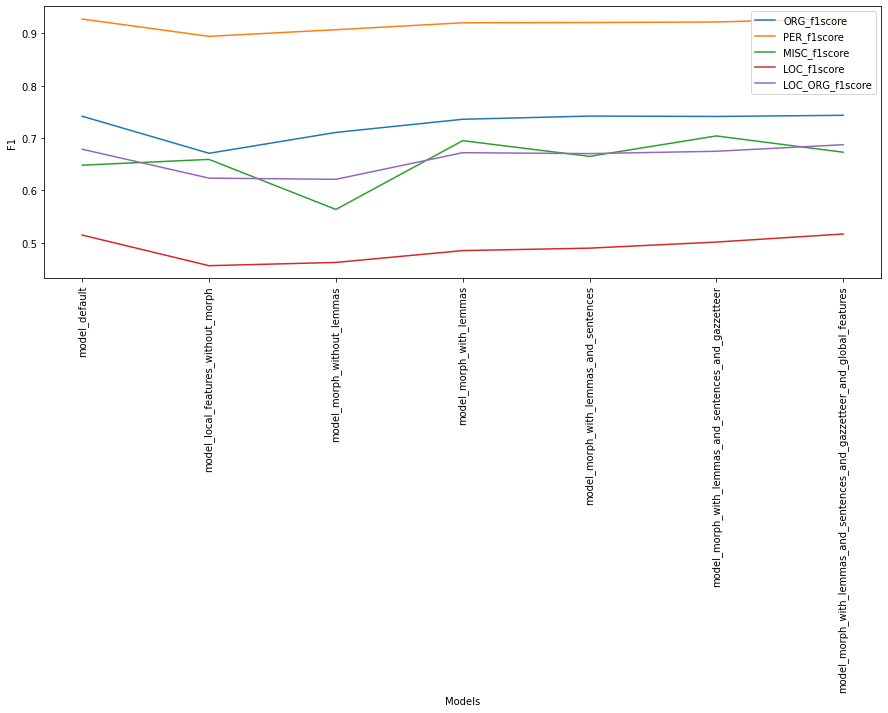

In [108]:
plt.figure(figsize=(15,5))
for key in vals:
    plt.plot(vals[key], label=key)
plt.xticks(np.arange(7), ([model for model in models]), rotation=90)
plt.legend()
plt.xlabel('Models')
plt.ylabel('F1')
plt.show()

##### -VabaMorfCorpusTagger

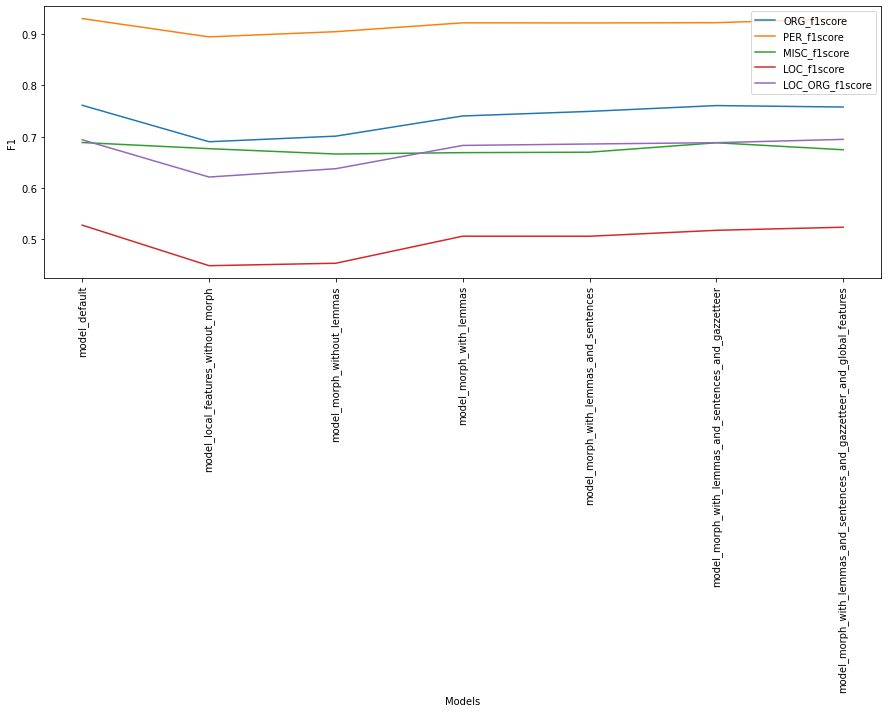

In [109]:
plt.figure(figsize=(15,5))
for key in vals_old:
    plt.plot(vals_old[key], label=key)
plt.xticks(np.arange(7), ([model for model in models]), rotation=90)
plt.legend()
plt.xlabel('Models')
plt.ylabel('F1')
plt.show()

# All models:

### model_default

In [7]:
with open(os.path.join('models', 'model_default', 'results.txt')) as file:
    results_json = json.loads(file.read())
    display(display_results_by_subdistribution(results_json))
    display(pd.DataFrame(display_results_by_named_entity(results_json)))

Alamhulk,1,2,3,4,5,Total
Precision,0.908903,0.911657,0.901951,0.876231,0.912500,0.901390
Recall,0.874115,0.879566,0.872912,0.843024,0.876000,0.868160
F1-score,0.891170,0.895324,0.887194,0.859307,0.893878,0.884463


,1,2,3,4,5,Total
ORG_precision,0.740741,0.765625,0.830769,0.750000,0.727273,0.762882
ORG_recall,0.677966,0.742424,0.771429,0.698630,0.717949,0.721680
ORG_f1score,0.707965,0.753846,0.800000,0.723404,0.722581,0.741559
PER_precision,0.938522,0.941208,0.935541,0.901430,0.946442,0.932629
PER_recall,0.924376,0.921990,0.921767,0.904260,0.938306,0.922140
PER_f1score,0.931396,0.931500,0.928603,0.902843,0.942357,0.927339
MISC_precision,0.689655,0.891892,0.578947,0.771429,0.621622,0.710709
MISC_recall,0.487805,0.647059,0.523810,0.771429,0.575000,0.601020
MISC_f1score,0.571429,0.750000,0.550000,0.771429,0.597403,0.648052
LOC_precision,0.568421,0.668831,0.672566,0.588710,0.612903,0.622286


### model_local_features_without_morph

In [8]:
with open(os.path.join('models', 'model_local_features_without_morph', 'results.txt')) as file:
    results_json = json.loads(file.read())
    display(display_results_by_subdistribution(results_json))
    display(pd.DataFrame(display_results_by_named_entity(results_json)))

Alamhulk,1,2,3,4,5,Total
Precision,0.868518,0.861943,0.862891,0.855030,0.873178,0.864131
Recall,0.837389,0.834846,0.840959,0.805313,0.845053,0.831681
F1-score,0.852670,0.848178,0.851784,0.829427,0.858885,0.847596


,1,2,3,4,5,Total
ORG_precision,0.694915,0.666667,0.686567,0.732394,0.637681,0.683645
ORG_recall,0.694915,0.666667,0.657143,0.712329,0.564103,0.659031
ORG_f1score,0.694915,0.666667,0.671533,0.722222,0.598639,0.670795
PER_precision,0.906026,0.901971,0.899566,0.884729,0.913665,0.901191
PER_recall,0.886954,0.874346,0.897229,0.874215,0.904425,0.887434
PER_f1score,0.896389,0.887944,0.898396,0.879441,0.909022,0.894238
MISC_precision,0.555556,0.769231,0.666667,0.694444,0.805556,0.698291
MISC_recall,0.487805,0.588235,0.619048,0.714286,0.725000,0.626875
MISC_f1score,0.519481,0.666667,0.641975,0.704225,0.763158,0.659101
LOC_precision,0.440000,0.513089,0.573529,0.542373,0.467626,0.507323


### model_morph_without_lemmas

In [9]:
with open(os.path.join('models', 'model_morph_without_lemmas', 'results.txt')) as file:
    results_json = json.loads(file.read())
    display(display_results_by_subdistribution(results_json))
    display(pd.DataFrame(display_results_by_named_entity(results_json)))

Alamhulk,1,2,3,4,5,Total
Precision,0.872620,0.876681,0.867104,0.853961,0.881408,0.869911
Recall,0.851770,0.851450,0.863955,0.819060,0.843368,0.844599
F1-score,0.862069,0.863881,0.865527,0.836146,0.861969,0.857068


,1,2,3,4,5,Total
ORG_precision,0.737705,0.704918,0.679487,0.726027,0.688312,0.707290
ORG_recall,0.762712,0.651515,0.757143,0.726027,0.679487,0.715377
ORG_f1score,0.750000,0.677165,0.716216,0.726027,0.683871,0.710656
PER_precision,0.913423,0.921867,0.912352,0.894785,0.925831,0.913651
PER_recall,0.896570,0.904974,0.910508,0.880942,0.908976,0.900394
PER_f1score,0.904918,0.913342,0.911429,0.887809,0.917326,0.906965
MISC_precision,0.677419,0.205128,0.690476,0.735294,0.657895,0.593243
MISC_recall,0.512195,0.156863,0.690476,0.714286,0.625000,0.539764
MISC_f1score,0.583333,0.177778,0.690476,0.724638,0.641026,0.563450
LOC_precision,0.404959,0.579235,0.563758,0.475177,0.492647,0.503155


### model_morph_with_lemmas

In [10]:
with open(os.path.join('models', 'model_morph_with_lemmas', 'results.txt')) as file:
    results_json = json.loads(file.read())
    display(display_results_by_subdistribution(results_json))
    display(pd.DataFrame(display_results_by_named_entity(results_json)))

Alamhulk,1,2,3,4,5,Total
Precision,0.901825,0.908111,0.901931,0.876793,0.906147,0.898199
Recall,0.863717,0.857649,0.870491,0.828906,0.865895,0.856144
F1-score,0.882360,0.882159,0.885932,0.852177,0.885564,0.876667


,1,2,3,4,5,Total
ORG_precision,0.727273,0.738462,0.805970,0.746269,0.767123,0.757019
ORG_recall,0.677966,0.727273,0.771429,0.684932,0.717949,0.715910
ORG_f1score,0.701754,0.732824,0.788321,0.714286,0.741722,0.735782
PER_precision,0.932623,0.937908,0.935038,0.907099,0.941297,0.930793
PER_recall,0.910083,0.901571,0.918303,0.891031,0.928445,0.909887
PER_f1score,0.921215,0.919381,0.926595,0.898993,0.934827,0.920202
MISC_precision,0.733333,0.868421,0.736842,0.848485,0.605263,0.758469
MISC_recall,0.536585,0.647059,0.666667,0.800000,0.575000,0.645062
MISC_f1score,0.619718,0.741573,0.700000,0.823529,0.589744,0.694913
LOC_precision,0.490000,0.629139,0.632479,0.600000,0.539062,0.578136


### model_morph_with_lemmas_and_sentences

In [11]:
with open(os.path.join('models', 'model_morph_with_lemmas_and_sentences', 'results.txt')) as file:
    results_json = json.loads(file.read())
    display(display_results_by_subdistribution(results_json))
    display(pd.DataFrame(display_results_by_named_entity(results_json)))

Alamhulk,1,2,3,4,5,Total
Precision,0.902636,0.909640,0.895611,0.870898,0.906858,0.896287
Recall,0.863496,0.866947,0.874365,0.828349,0.862947,0.857860
F1-score,0.882632,0.887781,0.884860,0.849091,0.884358,0.876653


,1,2,3,4,5,Total
ORG_precision,0.773585,0.761905,0.805970,0.742424,0.794118,0.775600
ORG_recall,0.694915,0.727273,0.771429,0.671233,0.692308,0.711431
ORG_f1score,0.732143,0.744186,0.788321,0.705036,0.739726,0.741882
PER_precision,0.932145,0.941590,0.932633,0.901408,0.939215,0.929398
PER_recall,0.910343,0.911518,0.923210,0.889686,0.925917,0.912135
PER_f1score,0.921115,0.926310,0.927898,0.895509,0.932518,0.920670
MISC_precision,0.724138,0.868421,0.631579,0.823529,0.594595,0.728452
MISC_recall,0.512195,0.647059,0.571429,0.800000,0.550000,0.616137
MISC_f1score,0.600000,0.741573,0.600000,0.811594,0.571429,0.664919
LOC_precision,0.524752,0.600000,0.596774,0.604651,0.586207,0.582477


### model_morph_with_lemmas_and_sentences_and_gazzetteer

In [12]:
with open(os.path.join('models', 'model_morph_with_lemmas_and_sentences_and_gazzetteer', 'results.txt')) as file:
    results_json = json.loads(file.read())
    display(display_results_by_subdistribution(results_json))
    display(pd.DataFrame(display_results_by_named_entity(results_json)))

Alamhulk,1,2,3,4,5,Total
Precision,0.903270,0.907025,0.901321,0.875171,0.909212,0.898399
Recall,0.867699,0.866062,0.875575,0.832250,0.864421,0.859920
F1-score,0.885128,0.886070,0.888261,0.853171,0.886251,0.878739


,1,2,3,4,5,Total
ORG_precision,0.740741,0.742424,0.833333,0.731343,0.777778,0.765124
ORG_recall,0.677966,0.742424,0.785714,0.671233,0.717949,0.719057
ORG_f1score,0.707965,0.742424,0.808824,0.700000,0.746667,0.741176
PER_precision,0.932590,0.940412,0.935616,0.904470,0.941328,0.930883
PER_recall,0.913202,0.908901,0.922921,0.893722,0.924905,0.912730
PER_f1score,0.922794,0.924388,0.929225,0.899064,0.933044,0.921703
MISC_precision,0.733333,0.871795,0.615385,0.794118,0.789474,0.760821
MISC_recall,0.536585,0.666667,0.571429,0.771429,0.750000,0.659222
MISC_f1score,0.619718,0.755556,0.592593,0.782609,0.769231,0.703941
LOC_precision,0.523364,0.610063,0.644628,0.591667,0.613445,0.596634


### model_morph_with_lemmas_and_sentences_and_gazzetteer_and_global_features

In [13]:
with open(os.path.join('models', 'model_morph_with_lemmas_and_sentences_and_gazzetteer_and_global_features', 'results.txt')) as file:
    results_json = json.loads(file.read())
    display(display_results_by_subdistribution(results_json))
    display(pd.DataFrame(display_results_by_named_entity(results_json)))

Alamhulk,1,2,3,4,5,Total
Precision,0.913446,0.911980,0.900298,0.881566,0.913952,0.903568
Recall,0.873230,0.883108,0.876543,0.844882,0.874316,0.869405
F1-score,0.892885,0.897312,0.888262,0.862834,0.893695,0.886157


,1,2,3,4,5,Total
ORG_precision,0.745455,0.731343,0.833333,0.750000,0.753425,0.762711
ORG_recall,0.694915,0.742424,0.785714,0.698630,0.705128,0.725362
ORG_f1score,0.719298,0.736842,0.808824,0.723404,0.728477,0.743369
PER_precision,0.941036,0.942323,0.933723,0.908191,0.947342,0.934523
PER_recall,0.920738,0.923822,0.923210,0.904933,0.937042,0.921949
PER_f1score,0.930776,0.932981,0.928437,0.906559,0.942163,0.928183
MISC_precision,0.733333,0.894737,0.615385,0.794118,0.638889,0.735292
MISC_recall,0.536585,0.666667,0.571429,0.771429,0.575000,0.624222
MISC_f1score,0.619718,0.764045,0.592593,0.782609,0.605263,0.672846
LOC_precision,0.589474,0.658065,0.672414,0.579365,0.614754,0.622814
